In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from datetime import datetime

## Load productivity data

In [2]:
# This will need to be updated every month

data_path = '/Users/briandomino/Documents/Google Data Analytics Certificate/capstone project/BeFocused 05 Aug 2022.csv'

In [3]:
raw_data = pd.read_csv(data_path)

## Clean the data

In [4]:
# Remove the first row, which is blank
raw_data.drop([0], inplace = True)

In [5]:
# Remove unneeded columns
# Note the leading space in the column names, and the trailing space in the last one

raw_data.drop(columns = [' Duration', ' Task state '], inplace = True)

In [6]:
# shorten column names
raw_data.rename(columns={' Assigned task': 'task', 'Start date': 'date'}, inplace = True)

In [7]:
# put date in datetime format
raw_data['date'] = pd.to_datetime(raw_data['date'])

In [8]:
# Make all the tasks lowercase for plot sorting
raw_data['task'] = raw_data['task'].str.lower()

In [9]:
# Change one task name to be more descriptive
raw_data['task'].replace({'reading': 'research'}, inplace = True)

In [10]:
# add separate year and month columns
raw_data['year'] = raw_data['date'].dt.year
raw_data['month'] = raw_data['date'].dt.month

## Collect the important tasks from the past month of data

In [11]:
current_date = datetime.now()
month_ago = current_date - pd.DateOffset(months=1)
month_ago = pd.Timestamp(month_ago).replace(hour=0, minute=0, second=0)
year_ago = current_date - pd.DateOffset(months=13) - pd.DateOffset(days = (current_date.day - 1))
year_ago = pd.Timestamp(year_ago).replace(hour=0, minute=0, second=0)

In [12]:
most_important_tasks = ['email', 'research', 'writing', 'financial/adult','python', 'health', 'leisure reading']

In [13]:
last_months_intervals = raw_data[(raw_data['year'] == month_ago.year) & (raw_data['month'] == month_ago.month)]

In [14]:
last_months_intervals = last_months_intervals.loc[last_months_intervals['task'].isin(most_important_tasks)]

## Gather the past 13 months totals

In [15]:
firstday_last_month = last_months_intervals['date'].min()
lastday_last_month = last_months_intervals['date'].max()
firstday_last_month = pd.Timestamp(firstday_last_month).replace(hour=0, minute=0, second=0)
lastday_last_month = pd.Timestamp(lastday_last_month).replace(hour=0, minute=0, second=0)

In [16]:
last_years_intervals = raw_data[(raw_data['date'] >= year_ago) & (raw_data['date'] <= lastday_last_month)]

In [17]:
mois = last_years_intervals.date.dt.to_period("M")

## Plot them side-by-side
### Uncomment plt.savefig if  you want to save the visualizaations

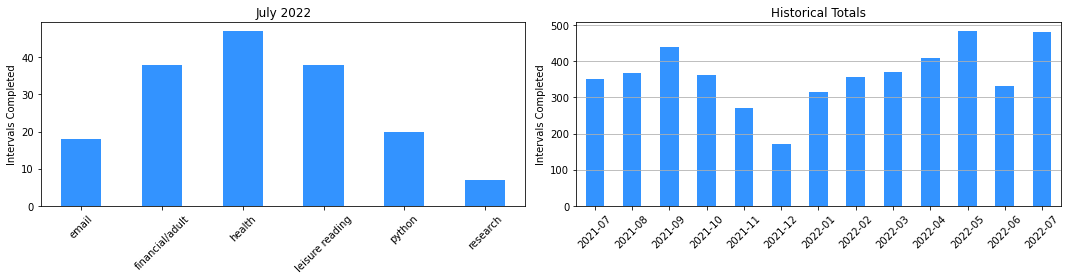

In [18]:
fig, ax = plt.subplots(ncols=2, figsize=(15,4))

last_months_intervals.groupby(last_months_intervals['task']).count().plot(kind='bar', color = '#3393FF',
                                legend = False, ylabel = 'Intervals Completed', xlabel = '', sort_columns = True,
                                rot = 45, title = month_ago.strftime("%B %Y"),ax = ax[0])


 
last_years_intervals.groupby(mois)['task'].count().plot(kind='bar', color = '#3393FF', rot = 45,
                        ylabel = 'Intervals Completed', xlabel = '', title='Historical Totals', ax=ax[1]).grid(axis='y')
 
plt.subplots_adjust(wspace = 0.4)
plt.tight_layout()    
# plt.savefig('monthly_dashboard.png',dpi=300)
plt.show()

In [19]:
# Tell me which tasks I didn't do at all

tasks_never_did = most_important_tasks.copy()
for index, value in last_months_intervals['task'].iteritems():
    if value in tasks_never_did:
            tasks_never_did.remove(value)

            
if len(tasks_never_did) == 0:
    print('Congratuations! You did at least one interval of every important task!')
else:
    print(f'You did not do even a single interval of the following: {", ".join(tasks_never_did)}.')

You did not do even a single interval of the following: writing.
